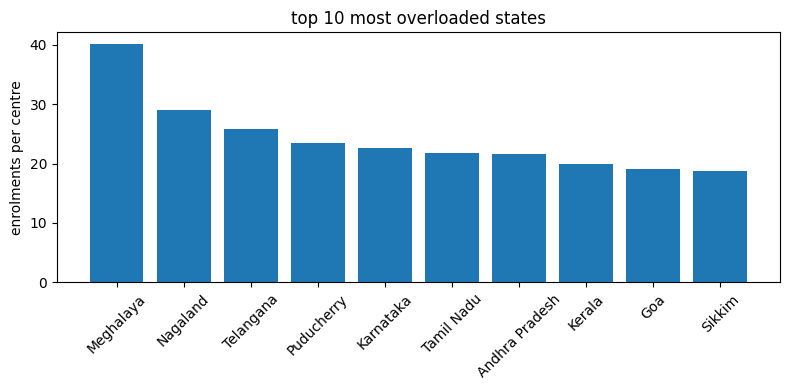

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

enrolment_df=pd.read_parquet("../sql/data/data_cache/enrolment_clean.parquet")
enrolments=enrolment_df.groupby("state").size().reset_index(name="enrolments")

centres=pd.read_csv("../sql/data/Aadhar.csv")
centres=centres.rename(columns={"State":"state","No. of centres":"centres"})
centres["centres"]=pd.to_numeric(centres["centres"],errors="coerce")

df=enrolments.merge(centres,on="state",how="inner")
df["enrolments_per_centre"]=df["enrolments"]/df["centres"]
df=df.sort_values("enrolments_per_centre",ascending=False).head(10)

plt.figure(figsize=(8,4))
plt.bar(df["state"],df["enrolments_per_centre"])
plt.xticks(rotation=45)
plt.ylabel("enrolments per centre")
plt.title("top 10 most overloaded states")
plt.tight_layout()
plt.show()
